# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
imdf_cyber = pd.read_csv("ExportedDatasets/cyberbullying_dataset.csv")

### 3.  Check first 10 lines

In [3]:
imdf_cyber.head(10)

tweet_text  cyberbullying_type
0         In other words your food was crapilicious                    0
1                                   Why is so white                    0
2         a classy whore Or more red velvet cupcakes                   0
3  meh P  thanks for the heads up but not too con...                   0
4  This is an ISIS account pretending to be a Kur...                   0
5  Yes the test of god is that good or bad or ind...                   0
6  Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7  Karma I hope it bites Kat on the butt She is j...                   0
8                    everything but mostly my priest                   0
9  Rebecca Black Drops Out of School Due to Bullying                   0

### 4. Check Datasets type values and sum & drop duplicates

In [4]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91801 entries, 0 to 91800
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          91801 non-null  object
 1   cyberbullying_type  91801 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
imdf_cyber['cyberbullying_type'].value_counts()

1    50178
0    41623
Name: cyberbullying_type, dtype: int64

In [6]:
imdf_cyber.tweet_text.duplicated().sum()

40901

In [7]:
imdf_cyber.duplicated().sum()

37337

In [8]:
imdf_cyber.duplicated(subset=['tweet_text']).sum()

40901

In [9]:
final_dataset = imdf_cyber.drop_duplicates()
final_dataset.to_csv('ExportedDatasets/cyberbullying_dataset_duplicates.csv')

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54464 entries, 0 to 79706
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54464 non-null  object
 1   cyberbullying_type  54464 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
final_dataset['cyberbullying_type'].value_counts()

1    39990
0    14474
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

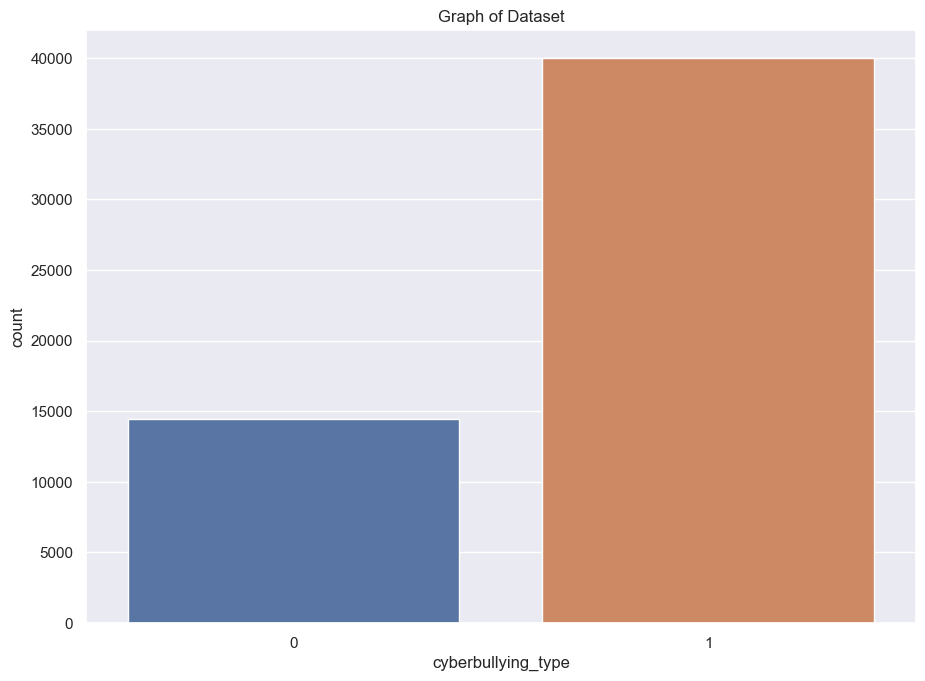

In [12]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=final_dataset).set(title="Graph of Dataset")

### 5.1.1  Handle Imbalanced Dataset

In [13]:
cyberbullying = final_dataset[final_dataset.cyberbullying_type == 1]
print(cyberbullying)

                                              tweet_text  cyberbullying_type
7819   rape is realzvasiyana nema jokes about being d...                   1
7820   You never saw any celebrity say anything like ...                   1
7821   I mean hes gay but he uses gendered slurs and ...                   1
7822                                            feminazi                   1
7823   Rape is rape And the fact that I read one post...                   1
...                                                  ...                 ...
63871  I didnt think Id hate a couple more than these...                   1
63891  Nope call me sexist but gender roles are defin...                   1
63896   Some of you people will call me sexist and mi...                   1
63904        Im not sexist but I hate all female rappers                   1
79706   A Misogynist A woman wants her man to treat h...                   1

[39990 rows x 2 columns]


In [14]:
no_cyberbullying = final_dataset[final_dataset.cyberbullying_type == 0]
print(no_cyberbullying)

                                              tweet_text  cyberbullying_type
0             In other words your food was crapilicious                    0
1                                       Why is so white                    0
2             a classy whore Or more red velvet cupcakes                   0
3      meh P  thanks for the heads up but not too con...                   0
4      This is an ISIS account pretending to be a Kur...                   0
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[14474 rows x 2 columns]


In [15]:
cyberbullying_sample = cyberbullying.sample(n=15526)

In [16]:
print(cyberbullying_sample.shape)

(15526, 2)


In [17]:
final_dataset = pd.concat([cyberbullying_sample, no_cyberbullying], axis=0)

In [18]:
final_dataset.head()

tweet_text  cyberbullying_type
17348  so you understood by reading this that vhp goo...                   1
7979   okay but look at it from my perspective I get ...                   1
9746   which connects to my first post about the part...                   1
17643  Pakistan a Muslim country born just  years bac...                   1
10132  Im pretty sure I am bc everyone whos seen this...                   1

In [19]:
final_dataset.shape

(30000, 2)

In [20]:
final_dataset.info

<bound method DataFrame.info of                                               tweet_text  cyberbullying_type
17348  so you understood by reading this that vhp goo...                   1
7979   okay but look at it from my perspective I get ...                   1
9746   which connects to my first post about the part...                   1
17643  Pakistan a Muslim country born just  years bac...                   1
10132  Im pretty sure I am bc everyone whos seen this...                   1
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[30000 rows x 2 columns]>

### 6.  WordCloud of Dataset

In [21]:
text = ''.join(final_dataset["tweet_text"].tolist())

In [22]:
''.join(final_dataset["tweet_text"].tolist())

'so you understood by reading this that vhp goons are quoting geeta what I said is that youre saying vhp goons are not connected to hindu because they dont quote geeta similar those isis terrorist that claim that they got it from quran are referring to what they interpretokay but look at it from my perspective I get triggered and sad whenever someone jokes about sexual assault or rape bc I have to live through it the same goes for people coming out as trans bi or gay so Im sorry but they have every right to say that they are hurt by itwhich connects to my first post about the party I went to its a big nono when straight ppl try to rape others right but why does it seem like a joke to ppl when gay ppl do it Its just something Ive noticed lately obviously rape isnt okay in any shape or formPakistan a Muslim country born just  years back  and these Islamic idiots claiming that their civilisation is thousands of years old  What you seeing in Pakistan is old Hindu civilisation and culture T

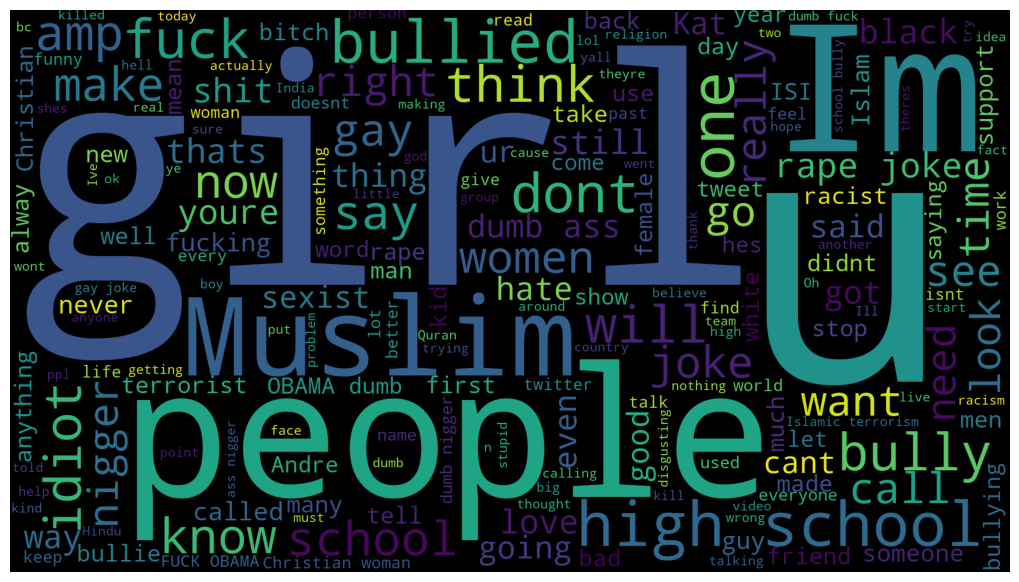

In [23]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Stopwords

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [26]:
final_dataset.shape

(30000, 2)

In [27]:
final_dataset.head()

tweet_text  cyberbullying_type
17348  so you understood by reading this that vhp goo...                   1
7979   okay but look at it from my perspective I get ...                   1
9746   which connects to my first post about the part...                   1
17643  Pakistan a Muslim country born just  years bac...                   1
10132  Im pretty sure I am bc everyone whos seen this...                   1

In [28]:
final_dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [29]:
#separating tweet_text & cyberbullying_type
X = final_dataset.drop(columns='cyberbullying_type', axis=1)
Y = final_dataset['cyberbullying_type']
X.to_csv('ExportedDatasets/cyberbullying_X.csv')
Y.to_csv('ExportedDatasets/cyberbullying_Y.csv')

In [30]:
print(X)
print(Y)

                                              tweet_text
17348  so you understood by reading this that vhp goo...
7979   okay but look at it from my perspective I get ...
9746   which connects to my first post about the part...
17643  Pakistan a Muslim country born just  years bac...
10132  Im pretty sure I am bc everyone whos seen this...
...                                                  ...
63915  Soz my kitchen rules Ive lost interest the ins...
63916  Feeling so sorry for the girls they should be ...
63917  pretty good dishes were happy with  OK well Im...
63919              You are too stupid to talk to Blocked
63920  And before you protest that youre not mad ther...

[30000 rows x 1 columns]
17348    1
7979     1
9746     1
17643    1
10132    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


### 9. Stemming: Process of reducing a word to its root word

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
final_dataset['tweet_text'] = final_dataset['tweet_text'].apply(stemming)

In [34]:
print(final_dataset['tweet_text'])

17348    understood read vhp goon quot geeta said your ...
7979     okay look perspect get trigger sad whenev some...
9746     connect first post parti went big nono straigh...
17643    pakistan muslim countri born year back islam i...
10132    im pretti sure bc everyon who seen like would ...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [35]:
text = ''.join(final_dataset["tweet_text"].tolist())
''.join(final_dataset["tweet_text"].tolist())

'understood read vhp goon quot geeta said your say vhp goon connect hindu dont quot geeta similar isi terrorist claim got quran refer interpretokay look perspect get trigger sad whenev someon joke sexual assault rape bc live goe peopl come tran bi gay im sorri everi right say hurtconnect first post parti went big nono straight ppl tri rape other right seem like joke ppl gay ppl someth ive notic late obvious rape isnt okay shape formpakistan muslim countri born year back islam idiot claim civilis thousand year old see pakistan old hindu civilis cultur time part also known bharatim pretti sure bc everyon who seen like would pass lmaoooo right bitch word dont bug lol bitch made men call femal bitch mean guess speakstay safe oaklandweek incid devop incid journalist incid journalist phd student journalist phd student photograph lordiamp promot sexist anti pro rape blog dont get joke make dropname call akin school yard bulli matur respons show childishli yoho behav moment weaselli nonapologs

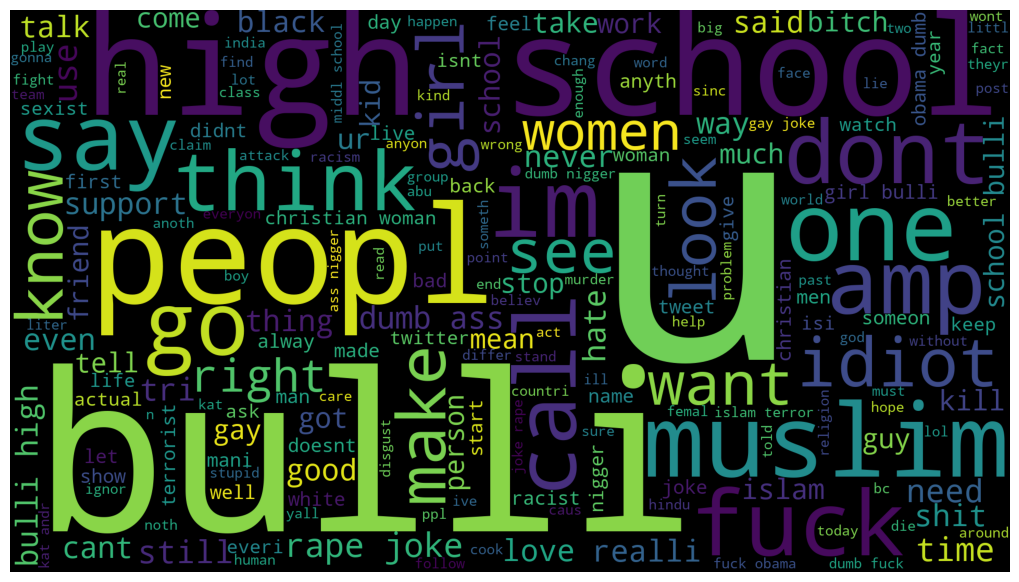

In [36]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
#separating tweet_text & cyberbullying_type
X = final_dataset['tweet_text']
Y = final_dataset['cyberbullying_type']

In [38]:
print(X)

17348    understood read vhp goon quot geeta said your ...
7979     okay look perspect get trigger sad whenev some...
9746     connect first post parti went big nono straigh...
17643    pakistan muslim countri born year back islam i...
10132    im pretti sure bc everyon who seen like would ...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [39]:
X.shape

(30000,)

In [40]:
print(Y)

17348    1
7979     1
9746     1
17643    1
10132    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


In [41]:
Y.shape

(30000,)

### 11. Train/Test Splitting

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=3)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [43]:
X_train.shape

(19500,)

In [44]:
X_test.shape

(10500,)

In [45]:
Y_train.shape

(19500,)

In [46]:
Y_test.shape

(10500,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [47]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [48]:
print(X_train_transform)

  (0, 1071)	0.30697809629420875
  (0, 843)	0.40868128516491153
  (0, 1984)	0.44104023679481935
  (0, 11321)	0.45233822209514957
  (0, 8842)	0.26671848362535927
  (0, 6374)	0.3413265892347914
  (0, 14227)	0.3898398490216738
  (1, 7247)	0.3599962888493841
  (1, 15232)	0.32944635608583955
  (1, 7720)	0.2635361975691549
  (1, 6126)	0.21876484588758785
  (1, 1672)	0.447263247519401
  (1, 16829)	0.37820085327870806
  (1, 4600)	0.5490702024774796
  (2, 15012)	0.3613128174490162
  (2, 5573)	0.42963697097731185
  (2, 13824)	0.5142709455359925
  (2, 14296)	0.16740099349304313
  (2, 13390)	0.3576210531401485
  (2, 9201)	0.5142709455359925
  (3, 9473)	1.0
  (4, 1741)	0.23562606397038557
  (4, 16211)	0.3566185985610302
  (4, 12759)	0.3874206725540476
  (4, 5679)	0.26927617926506087
  :	:
  (19498, 4726)	0.36863209658646723
  (19498, 6562)	0.36863209658646723
  (19498, 291)	0.2887860007611949
  (19498, 9598)	0.35641589005371843
  (19498, 9179)	0.3306767812514148
  (19498, 12882)	0.3042415214363927
 

In [49]:
print(X_test_transform)

  (1, 15297)	0.32920271843429716
  (1, 12797)	0.390797619012103
  (1, 10110)	0.26338720325189857
  (1, 9380)	0.17862929357361812
  (1, 8593)	0.4046468770565775
  (1, 7322)	0.19972669985769173
  (1, 6463)	0.39135560103365863
  (1, 4348)	0.5065528732414577
  (1, 2248)	0.1556813354040725
  (2, 16508)	0.5954569058879629
  (2, 14296)	0.19970249201135248
  (2, 10307)	0.34492626386471714
  (2, 4705)	0.48851296708208497
  (2, 2370)	0.4630769299884746
  (2, 2248)	0.18300464014943468
  (3, 11139)	0.4853666982224236
  (3, 6126)	0.44317878870384814
  (3, 4785)	0.4875881693989011
  (3, 1000)	0.5746907921325007
  (4, 16165)	0.576345523522879
  (4, 794)	0.817206116910011
  (5, 18165)	0.26972508600463835
  (5, 16369)	0.20550766089509698
  (5, 14020)	0.37018294007396435
  (5, 13652)	0.4779401512293498
  :	:
  (10498, 13402)	0.1524506530183488
  (10498, 12968)	0.2353170209005597
  (10498, 10522)	0.27210479616848604
  (10498, 9839)	0.13233413391647386
  (10498, 8064)	0.6213675850857775
  (10498, 8012)	0.

### 12. Training the Model: Logistic Regression (LR)

In [50]:
modelLR = LogisticRegression()

In [51]:
modelLR.fit(X_train_transform, Y_train)

LogisticRegression()

#### Evaluation: Accuracy Score

In [52]:
X_train_prediction = modelLR.predict(X_train_transform)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [53]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8593333333333333


In [54]:
X_test_prediction = modelLR.predict(X_test_transform)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8261904761904761


In [56]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5595
           1       0.78      0.87      0.82      4905

    accuracy                           0.83     10500
   macro avg       0.83      0.83      0.83     10500
weighted avg       0.83      0.83      0.83     10500



### 13. Training the Model: Support Vector Machine(SVM)

In [57]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(X_train_transform, Y_train)

LinearSVC(C=0.0001)

In [58]:
svm_predict = svm.predict(X_train_transform)
svm_training_data_accuracy = accuracy_score(Y_train,svm_predict)

print('Accuracy score of the training data : ', svm_training_data_accuracy)

Accuracy score of the training data :  0.5194358974358975


In [59]:
svm_predict_test = svm.predict(X_test_transform)
svm_test_data_accuracy = accuracy_score(Y_test,svm_predict_test)

print('Accuracy score of the test data : ', svm_test_data_accuracy)

Accuracy score of the test data :  0.5197142857142857


In [60]:
print(classification_report(svm_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.00      1.00      0.01        15
           1       1.00      0.52      0.68     10485

    accuracy                           0.52     10500
   macro avg       0.50      0.76      0.34     10500
weighted avg       1.00      0.52      0.68     10500



### 14. Training the Model: Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transform, Y_train)

MultinomialNB()

In [62]:
from sklearn.metrics import accuracy_score
nb_predict = mnb.predict(X_train_transform)
nb_training_data_accuracy = accuracy_score(Y_train,nb_predict)

print('Accuracy score of the training data : ', nb_training_data_accuracy)

Accuracy score of the training data :  0.8287179487179487


In [63]:
nb_predict_test = mnb.predict(X_test_transform)
nb_test_data_accuracy = accuracy_score(Y_test,nb_predict_test)

print('Accuracy score of the test data : ', nb_test_data_accuracy)

Accuracy score of the test data :  0.7366666666666667


In [64]:
print(classification_report(nb_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.59      0.81      0.68      3675
           1       0.87      0.70      0.77      6825

    accuracy                           0.74     10500
   macro avg       0.73      0.75      0.73     10500
weighted avg       0.77      0.74      0.74     10500



### 15. Training the Model: Decision Tree


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_transform,Y_train)

DecisionTreeClassifier()

In [66]:
dt_predict = dt.predict(X_train_transform)
dt_training_data_accuracy= accuracy_score(Y_train, dt_predict)

print('Accuracy score of the training data : ', dt_training_data_accuracy)

Accuracy score of the training data :  0.9661538461538461


In [67]:
dt_predict_test = dt.predict(X_test_transform)
dt_test_data_accuracy=accuracy_score(Y_test, dt_predict_test)

print('Accuracy score of the test data : ', dt_test_data_accuracy)

Accuracy score of the test data :  0.783047619047619


In [68]:
print(classification_report(dt_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5254
           1       0.77      0.80      0.79      5246

    accuracy                           0.78     10500
   macro avg       0.78      0.78      0.78     10500
weighted avg       0.78      0.78      0.78     10500



### 16. Training the Model: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_transform, Y_train)

RandomForestClassifier(n_estimators=30)

In [70]:
rf_predict = rf.predict(X_train_transform)
rf_training_data_accuracy=accuracy_score(Y_train, rf_predict)

print('Accuracy score of the training data : ', rf_training_data_accuracy)

Accuracy score of the training data :  0.9652307692307692


In [71]:
rf_predict_test = rf.predict(X_test_transform)
rf_test_data_accuracy=accuracy_score(Y_test, rf_predict_test)
print('Accuracy score of the test data : ', rf_test_data_accuracy)

Accuracy score of the test data :  0.8093333333333333


In [72]:
print(classification_report(rf_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      5628
           1       0.76      0.85      0.81      4872

    accuracy                           0.81     10500
   macro avg       0.81      0.81      0.81     10500
weighted avg       0.81      0.81      0.81     10500



### 17. Training the Model: XGBoost

In [73]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train_transform,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
xgb_prediction = modelXGB.predict(X_train_transform)
xgb_training_data_accuracy=accuracy_score(Y_train, xgb_prediction)

print('Accuracy score of the training data : ', xgb_training_data_accuracy)

Accuracy score of the training data :  0.8654871794871795


In [75]:
xgb_prediction_test = modelXGB.predict(X_test_transform)
xgb_test_data_accuracy=accuracy_score(Y_test, xgb_prediction_test)

print('Accuracy score of the test data : ', xgb_test_data_accuracy)

Accuracy score of the test data :  0.8417142857142857


In [76]:
print(classification_report(xgb_prediction_test,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6132
           1       0.75      0.93      0.83      4368

    accuracy                           0.84     10500
   macro avg       0.85      0.85      0.84     10500
weighted avg       0.86      0.84      0.84     10500



### 18.Summary

In [77]:
from sklearn.ensemble import VotingClassifier
# 1) naive bayes = mnb
# 2) logistic regression =modelLR
# 3) random forest =rf
# 4) support vector machine = svm
# 5) Decision Tree = dt
# 6) XGBoost = modelXGB
evc=VotingClassifier(estimators=[('mnb',mnb),('modelLR',modelLR),('rf',rf),('svm',svm),('dt',dt),('modelXGB',modelXGB)],voting='hard')
evc.fit(X_train_transform, Y_train)
evc_prediction = evc.predict(X_train_transform)
evc_prediction_test = evc.predict(X_test_transform)
evc_accuracy = accuracy_score(Y_train, evc_prediction)
evc_accuracy_test = accuracy_score(Y_test, evc_prediction_test)
print("score on test: " , evc_accuracy_test)
print("score on train: ", evc_accuracy)

score on test:  0.8256190476190476
score on train:  0.9337435897435897
